<a href="https://colab.research.google.com/github/TejashreeKarekar/DS_Projects/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [3]:
train_df=pd.read_csv('train.csv')
features_df=pd.read_csv('features.csv')
stores_df=pd.read_csv('stores.csv')
test_df=pd.read_csv('test.csv')

In [4]:
train_df.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [5]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [6]:
train_df.shape

(421570, 5)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [8]:
train_df.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [9]:
train_df.isnull()

Store   Dept   Date  Weekly_Sales  IsHoliday
0       False  False  False         False      False
1       False  False  False         False      False
2       False  False  False         False      False
3       False  False  False         False      False
4       False  False  False         False      False
...       ...    ...    ...           ...        ...
421565  False  False  False         False      False
421566  False  False  False         False      False
421567  False  False  False         False      False
421568  False  False  False         False      False
421569  False  False  False         False      False

[421570 rows x 5 columns]

In [10]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [11]:
features_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [12]:
features_df.shape

(8190, 12)

In [13]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [14]:
features_df.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

In [15]:
features_df.isnull()

Store   Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0     False  False        False       False       True       True       True   
1     False  False        False       False       True       True       True   
2     False  False        False       False       True       True       True   
3     False  False        False       False       True       True       True   
4     False  False        False       False       True       True       True   
...     ...    ...          ...         ...        ...        ...        ...   
8185  False  False        False       False      False      False      False   
8186  False  False        False       False      False      False      False   
8187  False  False        False       False      False      False      False   
8188  False  False        False       False      False      False      False   
8189  False  False        False       False      False      False      False   

      MarkDown4  MarkDown5    CPI  Unemployment  IsHoliday  
0          True       True  False         False      False  
1          True       True  False         False      False  
2          True       True  False         False      False  
3          True       True  False         False      False  
4          True       True  False         False      False  
...         ...        ...    ...           ...        ...  
8185      False      False   True          True      False  
8186      False      False   True          True      False  
8187      False      False   True          True      False  
8188      False      False   True          True      False  
8189      False      False   True          True      False  

[8190 rows x 12 columns]

In [16]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [17]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [18]:
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [19]:
stores_df.shape

(45, 3)

In [20]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [21]:
stores_df.describe()

Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000

In [22]:
stores_df.isnull()

Store   Type   Size
0   False  False  False
1   False  False  False
2   False  False  False
3   False  False  False
4   False  False  False
5   False  False  False
6   False  False  False
7   False  False  False
8   False  False  False
9   False  False  False
10  False  False  False
11  False  False  False
12  False  False  False
13  False  False  False
14  False  False  False
15  False  False  False
16  False  False  False
17  False  False  False
18  False  False  False
19  False  False  False
20  False  False  False
21  False  False  False
22  False  False  False
23  False  False  False
24  False  False  False
25  False  False  False
26  False  False  False
27  False  False  False
28  False  False  False
29  False  False  False
30  False  False  False
31  False  False  False
32  False  False  False
33  False  False  False
34  False  False  False
35  False  False  False
36  False  False  False
37  False  False  False
38  False  False  False
39  False  False  False
40  False  False  False
41  False  False  False
42  False  False  False
43  False  False  False
44  False  False  False

In [23]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [24]:
#Visualizing the type of stores along with their percentage
labels=stores_df["Type"].value_counts()[:10].index
values=stores_df["Type"].value_counts()[:10].values
colors=stores_df["Type"]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=colors))])
fig.show()

In [25]:
#Type A has maximum number of stores
#since features and stores have 'Store' as the same attribute, let's merge the data
#Using thr merge function to merge
dataset=features_df.merge(stores_df,how='inner',on='Store')
dataset.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type  \
0        NaN        NaN        NaN  211.096358         8.106      False    A   
1        NaN        NaN        NaN  211.242170         8.106       True    A   
2        NaN        NaN        NaN  211.289143         8.106      False    A   
3        NaN        NaN        NaN  211.319643         8.106      False    A   
4        NaN        NaN        NaN  211.350143         8.106      False    A   

     Size  
0  151315  
1  151315  
2  151315  
3  151315  
4  151315

In [30]:
stores_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [31]:
dataset.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 839.9+ KB


In [33]:
dataset.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  \
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000   
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821   
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259   
min      -179.260000      0.220000    -185.170000   126.064000      3.684000   
25%         6.600000    304.687500    1440.827500   132.364839      6.634000   
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000   
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000   
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000   

                Size  
count    8190.000000  
mean   130287.600000  
std     63115.971429  
min     34875.000000  
25%     70713.000000  
50%    126512.000000  
75%    202307.000000  
max    219622.000000

In [34]:
labels=dataset["Type"].value_counts().index
values=dataset["Type"].value_counts()[:10].values
colors=dataset["Type"]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=colors))])
fig.show()

In [29]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [28]:
labels=train_df["Dept"].value_counts()[:10].index
values=train_df["Dept"].value_counts()[:10].values
colors=train_df["Dept"]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=colors))])
fig.show()

In [27]:
labels=train_df["Store"].value_counts()[:10].index
values=train_df["Store"].value_counts()[:10].values
colors=train_df["Store"]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=colors))])
fig.show()

In [26]:
labels=train_df["IsHoliday"].value_counts()[:10].index
values=train_df["IsHoliday"].value_counts()[:10].values
colors=train_df["IsHoliday"]
fig=go.Figure(data=[go.Pie(labels=labels,values=values,textinfo="label+percent",marker=dict(colors=colors))])
fig.show()

In [35]:
test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

In [36]:
test_df.describe()

Store           Dept
count  115064.000000  115064.000000
mean       22.238207      44.339524
std        12.809930      30.656410
min         1.000000       1.000000
25%        11.000000      18.000000
50%        22.000000      37.000000
75%        33.000000      74.000000
max        45.000000      99.000000

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [38]:
from datetime import datetime
dataset['Date']=pd.to_datetime(dataset['Date'])
train_df['Date']=pd.to_datetime(train_df['Date'])
test_df['Date']=pd.to_datetime(test_df['Date'])

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
 12  Type          8190 non-null   object        
 13  Size          8190 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 839.9+ KB


In [41]:
dataset['Week'] = dataset['Date'].dt.isocalendar().week
dataset['Year'] = dataset['Date'].dt.year


In [42]:
dataset.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type    Size  \
0        NaN        NaN  211.096358         8.106      False    A  151315   
1        NaN        NaN  211.242170         8.106       True    A  151315   
2        NaN        NaN  211.289143         8.106      False    A  151315   
3        NaN        NaN  211.319643         8.106      False    A  151315   
4        NaN        NaN  211.350143         8.106      False    A  151315   

   Week  Year  
0     5  2010  
1     6  2010  
2     7  2010  
3     8  2010  
4     9  2010

In [43]:
train_merge = train_df.merge(dataset, how='inner', on=['Store', 'Date', 'IsHoliday']) .sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True)

In [44]:
test_merge = test_df.merge(dataset, how='inner', on=['Store', 'Date', 'IsHoliday']) .sort_values(by=['Store', 'Dept', 'Date']).reset_index(drop=True)

In [45]:
def scatter(train_merge,column):
    plt.figure()
    plt.scatter(train_merge[column],train_merge['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)


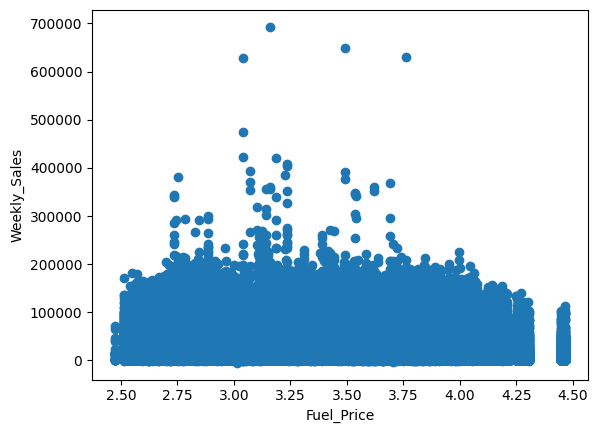

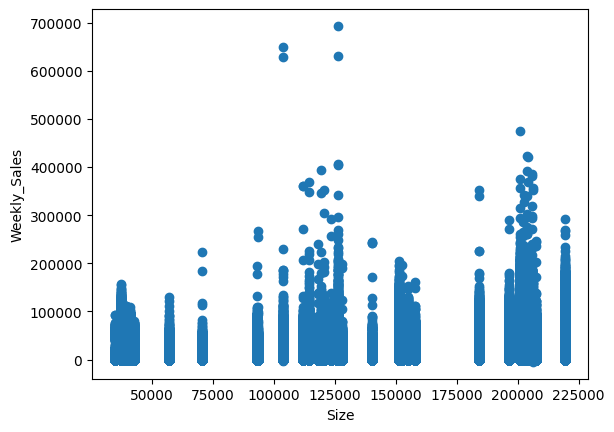

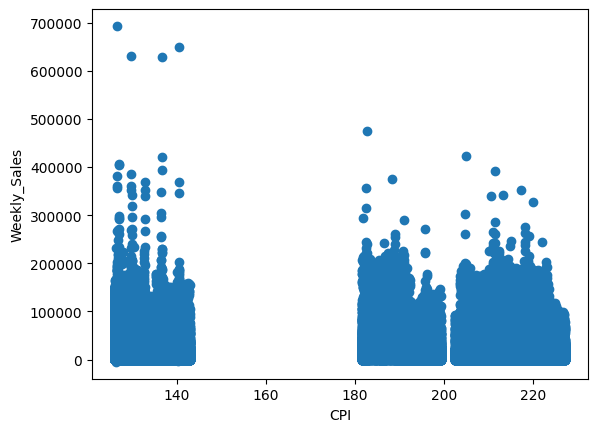

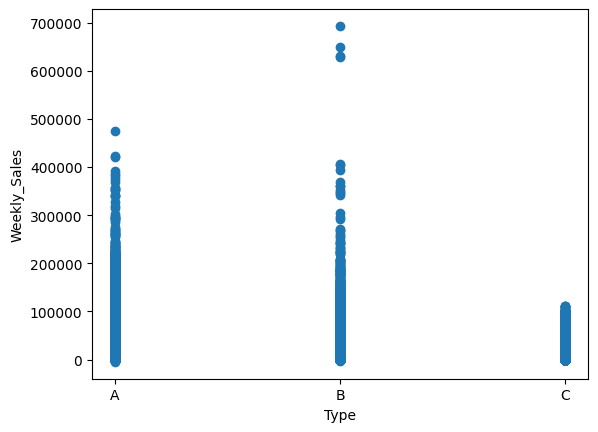

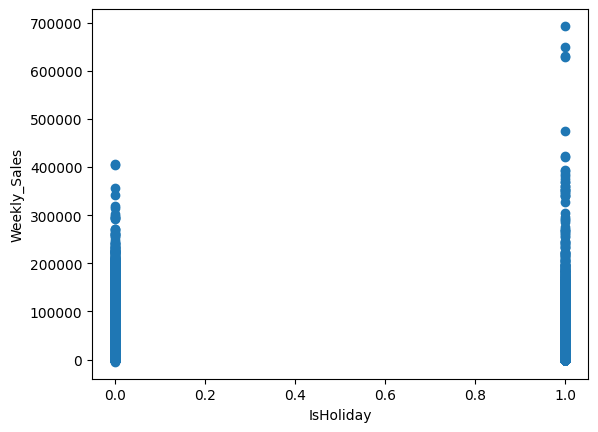

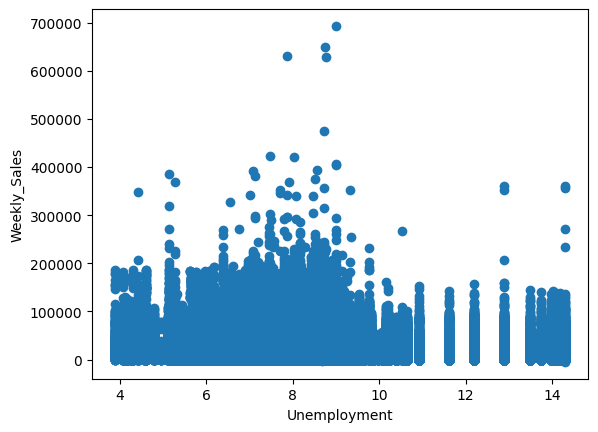

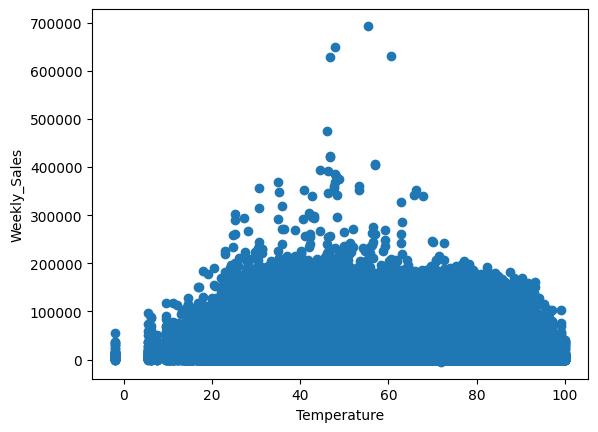

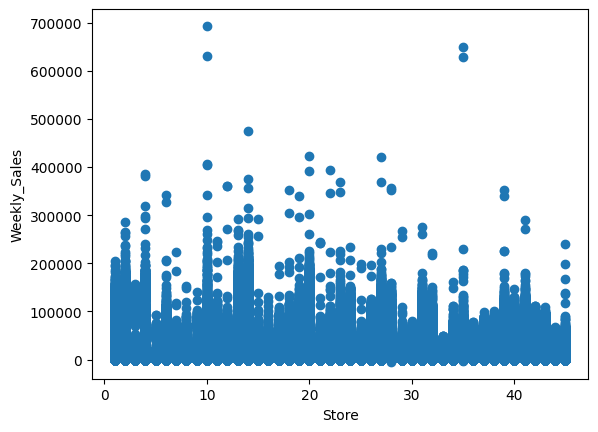

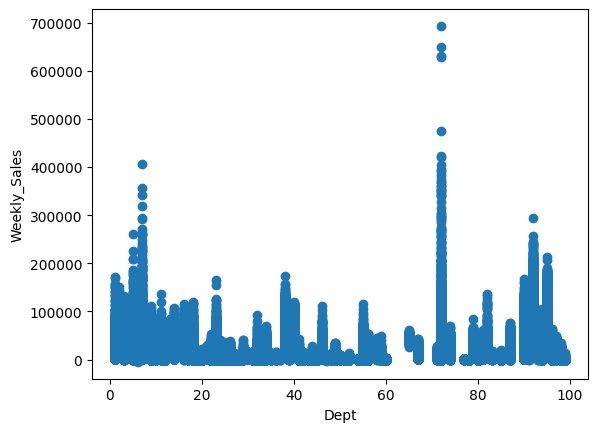

In [47]:
scatter(train_merge,'Fuel_Price')
scatter(train_merge,'Size')
scatter(train_merge,'CPI')
scatter(train_merge,'Type')
scatter(train_merge,'IsHoliday')
scatter(train_merge,'Unemployment')
scatter(train_merge,'Temperature')
scatter(train_merge,'Store')
scatter(train_merge,'Dept')

In [49]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

# Assume X contains your features and y contains your target variable
# For regression tasks (predicting Weekly_Sales):
X = train_merge[['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']]
y = train_merge['Weekly_Sales']

# For classification tasks (predicting IsHoliday):
# X = train_merge[['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']]
# y = train_merge['IsHoliday']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)
print(f"Linear Regression MSE: {lr_mse}")

# Logistic Regression (for classification tasks)
# log_model = LogisticRegression()
# log_model.fit(X_train_scaled, y_train)
# log_pred = log_model.predict(X_test_scaled)
# log_accuracy = accuracy_score(y_test, log_pred)
# print(f"Logistic Regression Accuracy: {log_accuracy}")

# Decision Tree (Regression)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
print(f"Decision Tree MSE: {dt_mse}")

# Random Forest (Regression)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse}")

# K-Nearest Neighbors (Regression)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_pred)
print(f"KNN MSE: {knn_mse}")

# Naive Bayes (for classification tasks)
# nb_model = GaussianNB()
# nb_model.fit(X_train_scaled, y_train)
# nb_pred = nb_model.predict(X_test_scaled)
# nb_accuracy = accuracy_score(y_test, nb_pred)
# print(f"Naive Bayes Accuracy: {nb_accuracy}")

Linear Regression MSE: 476119450.76655245
Decision Tree MSE: 48278476.752588265
Random Forest MSE: 29970324.222658806
KNN MSE: 328226237.25694376


In [50]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Assume X contains your features and y contains your target variable
# For regression tasks (predicting Weekly_Sales):
X = train_merge[['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']]
y = train_merge['Weekly_Sales']

# For classification tasks (predicting IsHoliday):
X_class = train_merge[['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']]
y_class = train_merge['IsHoliday']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R-squared: {lr_r2}")

# Logistic Regression (for classification tasks)
log_model = LogisticRegression()
log_model.fit(X_train_class_scaled, y_train_class)
log_pred = log_model.predict(X_test_class_scaled)
log_accuracy = accuracy_score(y_test_class, log_pred)
print(f"Logistic Regression Accuracy: {log_accuracy}")

# Decision Tree (Regression)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print(f"Decision Tree MSE: {dt_mse}")
print(f"Decision Tree R-squared: {dt_r2}")

# Decision Tree (Classification)
dt_class_model = DecisionTreeClassifier(random_state=42)
dt_class_model.fit(X_train_class, y_train_class)
dt_class_pred = dt_class_model.predict(X_test_class)
dt_class_accuracy = accuracy_score(y_test_class, dt_class_pred)
print(f"Decision Tree Classification Accuracy: {dt_class_accuracy}")

# Random Forest (Regression)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")

# Random Forest (Classification)
rf_class_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class_model.fit(X_train_class, y_train_class)
rf_class_pred = rf_class_model.predict(X_test_class)
rf_class_accuracy = accuracy_score(y_test_class, rf_class_pred)
print(f"Random Forest Classification Accuracy: {rf_class_accuracy}")

# K-Nearest Neighbors (Regression)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
print(f"KNN MSE: {knn_mse}")
print(f"KNN R-squared: {knn_r2}")

# K-Nearest Neighbors (Classification)
knn_class_model = KNeighborsClassifier(n_neighbors=5)
knn_class_model.fit(X_train_class_scaled, y_train_class)
knn_class_pred = knn_class_model.predict(X_test_class_scaled)
knn_class_accuracy = accuracy_score(y_test_class, knn_class_pred)
print(f"KNN Classification Accuracy: {knn_class_accuracy}")

# Naive Bayes (for classification tasks)
nb_model = GaussianNB()
nb_model.fit(X_train_class_scaled, y_train_class)
nb_pred = nb_model.predict(X_test_class_scaled)
nb_accuracy = accuracy_score(y_test_class, nb_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

Linear Regression MSE: 476119450.76655245
Linear Regression R-squared: 0.08696848478749031
Logistic Regression Accuracy: 0.9290034869653913
Decision Tree MSE: 48278476.752588265
Decision Tree R-squared: 0.9074186725398444
Decision Tree Classification Accuracy: 1.0
Random Forest MSE: 29970324.222658806
Random Forest R-squared: 0.9425273416316672
Random Forest Classification Accuracy: 1.0
KNN MSE: 328226237.25694376
KNN R-squared: 0.3705762319671634
KNN Classification Accuracy: 0.9379225276940959
Naive Bayes Accuracy: 0.9206063050027279
